In [1]:
import pandas as pd
import numpy as np

In [2]:
# data = pd.read_csv("Extended_Restaurant_Data.csv")

In [79]:
# x = data.drop(columns = ["Type"] )
# y = data["Type"]
# x.head() , y.head()

In [76]:
data = pd.read_csv("train.csv")

In [78]:
x = data.drop(columns = ["Id","Open Date","City","City Group","Type"] )
y = data["Type"]
x.head() , y.head()

(   P1   P2   P3   P4  P5  P6  P7  P8  P9  P10  ...  P29  P30  P31  P32  P33  \
 0   4  5.0  4.0  4.0   2   2   5   4   5    5  ...  3.0    5    3    4    5   
 1   4  5.0  4.0  4.0   1   2   5   5   5    5  ...  3.0    0    0    0    0   
 2   2  4.0  2.0  5.0   2   3   5   5   5    5  ...  3.0    0    0    0    0   
 3   6  4.5  6.0  6.0   4   4  10   8  10   10  ...  7.5   25   12   10    6   
 4   3  4.0  3.0  4.0   2   2   5   5   5    5  ...  3.0    5    1    3    2   
 
    P34  P35  P36  P37    revenue  
 0    5    4    3    4  5653753.0  
 1    0    0    0    0  6923131.0  
 2    0    0    0    0  2055379.0  
 3   18   12   12    6  2675511.0  
 4    3    4    3    3  4316715.0  
 
 [5 rows x 38 columns],
 0    IL
 1    FC
 2    IL
 3    IL
 4    IL
 Name: Type, dtype: object)

In [77]:
data.head()

,Id,Open Date,City,City Group,Type,P1,P2,P3,P4,P5,...,P29,P30,P31,P32,P33,P34,P35,P36,P37,revenue
0,0,07/17/1999,İstanbul,Big Cities,IL,4,5.0,4.0,4.0,2,...,3.0,5,3,4,5,5,4,3,4,5653753.0
1,1,02/14/2008,Ankara,Big Cities,FC,4,5.0,4.0,4.0,1,...,3.0,0,0,0,0,0,0,0,0,6923131.0
2,2,03/09/2013,Diyarbakır,Other,IL,2,4.0,2.0,5.0,2,...,3.0,0,0,0,0,0,0,0,0,2055379.0
3,3,02/02/2012,Tokat,Other,IL,6,4.5,6.0,6.0,4,...,7.5,25,12,10,6,18,12,12,6,2675511.0
4,4,05/09/2009,Gaziantep,Other,IL,3,4.0,3.0,4.0,2,...,3.0,5,1,3,2,3,4,3,3,4316715.0


In [80]:
y.unique()

array(['IL', 'FC', 'DT'], dtype=object)

In [81]:
length = len(y.unique())
length

3

In [82]:
y.value_counts()

FC    76
IL    60
DT     1
Name: Type, dtype: int64

In [83]:
len(x)

137

In [85]:
to = 20

x_test = x.iloc[:to]
y_test = y.iloc[:to]

x_train = x.iloc[len(x_test):]
y_train = y.iloc[len(y_test):]

In [86]:
x_train.shape, y_train.shape

((117, 38), (117,))

In [87]:
train_shape =x_train.iloc[0].shape
train_shape

(38,)

In [88]:
predict_shape = (x_train.iloc[0].shape)[0]
predict_shape

38

In [89]:
x_test.shape, y_test.shape

((20, 38), (20,))

In [90]:
from sklearn.preprocessing import LabelEncoder

y_train = LabelEncoder().fit_transform(y_train)
y_test = LabelEncoder().fit_transform(y_test)

In [91]:
y_train.shape, y_test.shape

((117,), (20,))

In [92]:
from tensorflow.keras import layers, Sequential

In [93]:
model = Sequential([
    
    layers.Dense(128, activation = 'relu', input_shape = train_shape),
    layers.Dense(64, activation = 'relu'),
    layers.Dense(32, activation = 'relu'),
    layers.Dense(32, activation = 'relu'),
    layers.Dense(16, activation = 'relu'),
    layers.Dense(8, activation = 'relu'),

    layers.Dense(length, activation = 'sigmoid')
                   ])

In [94]:
model.compile(optimizer = "adam", loss = "sparse_categorical_crossentropy", 
              metrics = ["accuracy"])

In [95]:
history = model.fit(x_train, y_train, epochs = 80, validation_split = 0.2)

Epoch 1/80
3/3 [==============================] - 1s 59ms/step - loss: 28929.3711 - accuracy: 0.6237 - val_loss: 2325.5046 - val_accuracy: 0.3333
Epoch 2/80
3/3 [==============================] - 0s 7ms/step - loss: 14862.3467 - accuracy: 0.4946 - val_loss: 7910.6074 - val_accuracy: 0.6250
Epoch 3/80
3/3 [==============================] - 0s 7ms/step - loss: 13188.2637 - accuracy: 0.5269 - val_loss: 20579.3848 - val_accuracy: 0.3333
Epoch 4/80
3/3 [==============================] - 0s 7ms/step - loss: 7361.1211 - accuracy: 0.5161 - val_loss: 5782.7671 - val_accuracy: 0.6250
Epoch 5/80
3/3 [==============================] - 0s 7ms/step - loss: 9382.0762 - accuracy: 0.4409 - val_loss: 4140.4365 - val_accuracy: 0.6250
Epoch 6/80
3/3 [==============================] - 0s 7ms/step - loss: 1709.2009 - accuracy: 0.5806 - val_loss: 18171.5879 - val_accuracy: 0.3333
Epoch 7/80
3/3 [==============================] - 0s 7ms/step - loss: 7610.0103 - accuracy: 0.4194 - val_loss: 13205.3057 - val_ac

3/3 [==============================] - 0s 7ms/step - loss: 612.9372 - accuracy: 0.6022 - val_loss: 3304.4700 - val_accuracy: 0.6250
Epoch 58/80
3/3 [==============================] - 0s 7ms/step - loss: 1044.3558 - accuracy: 0.4194 - val_loss: 3436.6716 - val_accuracy: 0.6250
Epoch 59/80
3/3 [==============================] - 0s 7ms/step - loss: 1005.5330 - accuracy: 0.5806 - val_loss: 4940.6172 - val_accuracy: 0.3333
Epoch 60/80
3/3 [==============================] - 0s 7ms/step - loss: 1302.6613 - accuracy: 0.4301 - val_loss: 3055.9675 - val_accuracy: 0.6250
Epoch 61/80
3/3 [==============================] - 0s 7ms/step - loss: 668.4243 - accuracy: 0.4194 - val_loss: 4043.2129 - val_accuracy: 0.6250
Epoch 62/80
3/3 [==============================] - 0s 7ms/step - loss: 2012.8929 - accuracy: 0.5806 - val_loss: 3240.8347 - val_accuracy: 0.6250
Epoch 63/80
3/3 [==============================] - 0s 7ms/step - loss: 2232.2207 - accuracy: 0.4194 - val_loss: 4993.9897 - val_accuracy: 0.3333

In [96]:
evaluation = model.evaluate(x_test,y_test,verbose=2)

1/1 - 0s - loss: 48450.2500 - accuracy: 0.0000e+00


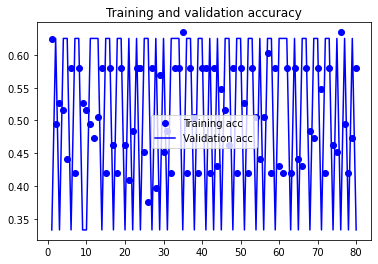

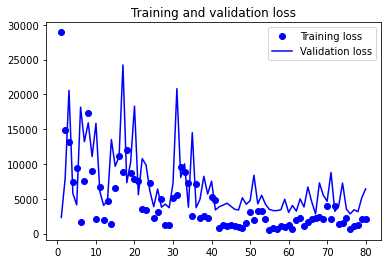

In [97]:
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [98]:
model.save("classification_model.h5")

In [99]:
from tensorflow.keras.models import load_model

loaded_model = load_model("classification_model.h5")

In [100]:
def find_max_index(prediction):
    
    a,d=0,0                                
    for i in prediction[0]:                
        if float(i)>a or float(i)==a:      
            a=i                            
            d=0                            
        elif float(i)<a:                   
            d=d+1    
    index = len(prediction[0])-d-1
    
    return index

In [101]:
labels = y.unique()
labels

array(['IL', 'FC', 'DT'], dtype=object)

In [102]:
def predict(n, data, label):
    
    inp = np.array(data.iloc[n]).reshape((1,predict_shape))  
    prediction = loaded_model.predict(inp)
    
    max_index = find_max_index(prediction)
    
    print("Predicted: %s"%(labels[max_index]) + '\n' + "Actual   : %s"%(labels[label[n]]))

In [103]:
predict(50,x_train,y_train)
print()
predict(8,x_test,y_test)

Predicted: DT
Actual   : FC

Predicted: DT
Actual   : FC


In [104]:
random = [50,754,68,7500,69,9000,456,8825,4569,147,9958,6214,897,1234]
for i in random:
    predict(i,x_train,y_train)
    print()

Predicted: DT
Actual   : FC



IndexError: single positional indexer is out-of-bounds

# Predicting Old Data

In [105]:
old_data = pd.read_csv("train.csv")
old_data.head()

,Id,Open Date,City,City Group,Type,P1,P2,P3,P4,P5,...,P29,P30,P31,P32,P33,P34,P35,P36,P37,revenue
0,0,07/17/1999,İstanbul,Big Cities,IL,4,5.0,4.0,4.0,2,...,3.0,5,3,4,5,5,4,3,4,5653753.0
1,1,02/14/2008,Ankara,Big Cities,FC,4,5.0,4.0,4.0,1,...,3.0,0,0,0,0,0,0,0,0,6923131.0
2,2,03/09/2013,Diyarbakır,Other,IL,2,4.0,2.0,5.0,2,...,3.0,0,0,0,0,0,0,0,0,2055379.0
3,3,02/02/2012,Tokat,Other,IL,6,4.5,6.0,6.0,4,...,7.5,25,12,10,6,18,12,12,6,2675511.0
4,4,05/09/2009,Gaziantep,Other,IL,3,4.0,3.0,4.0,2,...,3.0,5,1,3,2,3,4,3,3,4316715.0


In [106]:
old_x = old_data.drop(columns = ["Id","Open Date","City","City Group","Type"] )
old_y = old_data["Type"]

In [107]:
from sklearn.preprocessing import LabelEncoder

old_y = LabelEncoder().fit_transform(old_y)

In [108]:
predict(15,old_x,old_y)
print()
predict(95,old_x,old_y)
print()
predict(130,old_x,old_y)

Predicted: DT
Actual   : DT

Predicted: DT
Actual   : FC

Predicted: DT
Actual   : FC
